# 楽天グループ (4755) 日足

In [1]:
import sys

path_up = ".."
if not path_up in sys.path:
    sys.path.append(path_up)

In [2]:
import datetime

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import yfinance as yf

from funcs.technical import psar
from funcs.plot import plot_mm_parabolic, plot_robust_bollinger, plot_histogram_qqplot

In [3]:
code = "4755"
symbol = "%s.T" % code
ticker = yf.Ticker(symbol)

In [4]:
# 日足で過去 2 年分のデータを取得
df0 = ticker.history(period="3y", interval="1d")

# ローソク足のチャートには、そのうち過去 1 年分のみ使用する
dt_last = df0.index[len(df0) - 1]
tdelta_1y = datetime.timedelta(days=365)
df = df0[df0.index >= dt_last - tdelta_1y]
df.tail(2)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-05-14 00:00:00+09:00,888.799988,891.900024,874.500000,884.000000,15132100,0.0,0.0
2025-05-15 00:00:00+09:00,811.000000,828.099976,805.700012,814.099976,13664900,0.0,0.0


## 日足チャートとパラボリック SAR

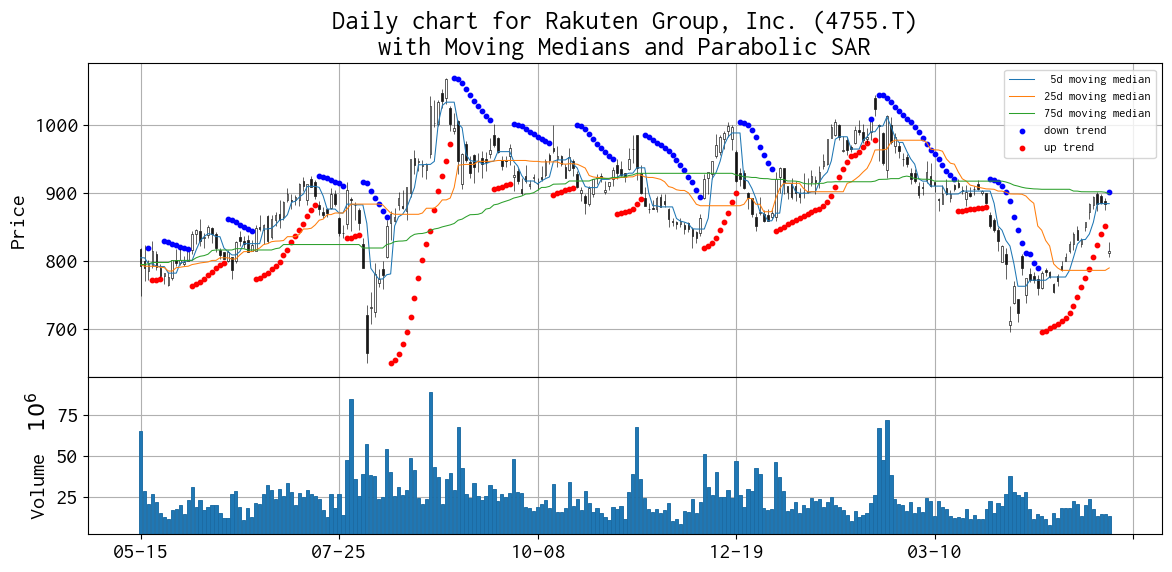

In [5]:
plot_mm_parabolic(ticker, df, df0)

plt.tight_layout()
plt.savefig("report_daily_chart_%s.png" % code)
plt.show()

In [6]:
df.tail(1)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2025-05-14 00:00:00+09:00,1326.0,1375.0,1306.0,1344.0,8830900,0.0,0.0


In [7]:
df.tail(2)['Close']

Date
2025-05-13 00:00:00+09:00    1363.0
2025-05-14 00:00:00+09:00    1344.0
Name: Close, dtype: float64

In [8]:
df.tail(2)['Close'].diff()

Date
2025-05-13 00:00:00+09:00     NaN
2025-05-14 00:00:00+09:00   -19.0
Name: Close, dtype: float64

In [9]:
df['Close'].rolling(5).median().tail(2)

Date
2025-05-13 00:00:00+09:00    1135.0
2025-05-14 00:00:00+09:00    1297.0
Name: Close, dtype: float64

In [10]:
df['Close'].rolling(25).median().tail(2)

Date
2025-05-13 00:00:00+09:00    862.0
2025-05-14 00:00:00+09:00    863.0
Name: Close, dtype: float64

## Robust Bollinger's bands

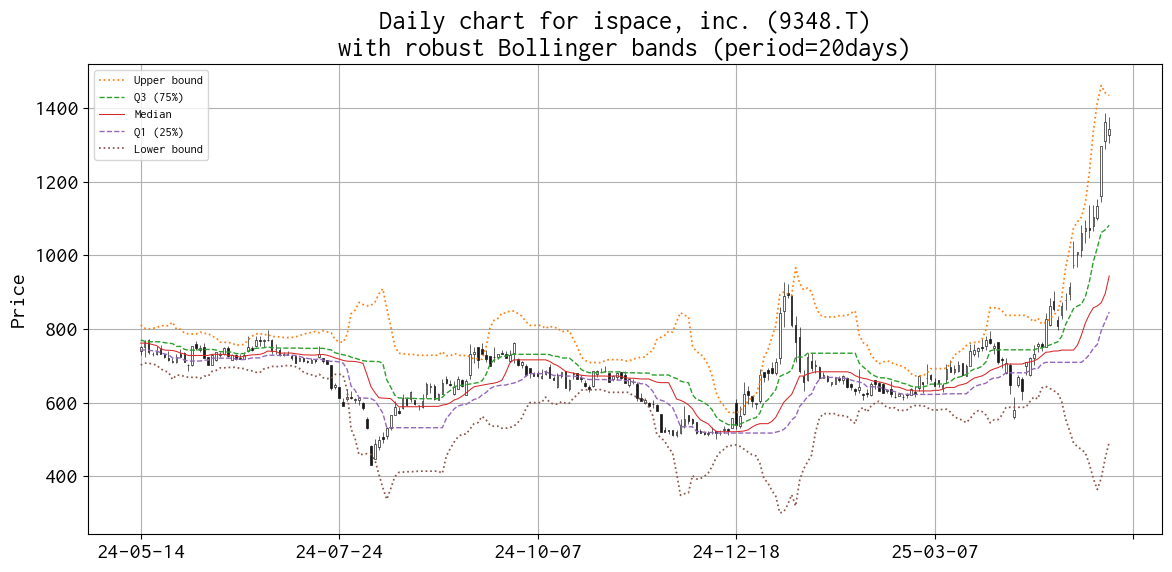

In [11]:
plot_robust_bollinger(ticker, df, df0)

plt.tight_layout()
plt.savefig("report_daily_chart_bollinger_robust_%s.png" % code)
plt.show()

## ヒストグラムと Q-Q プロット

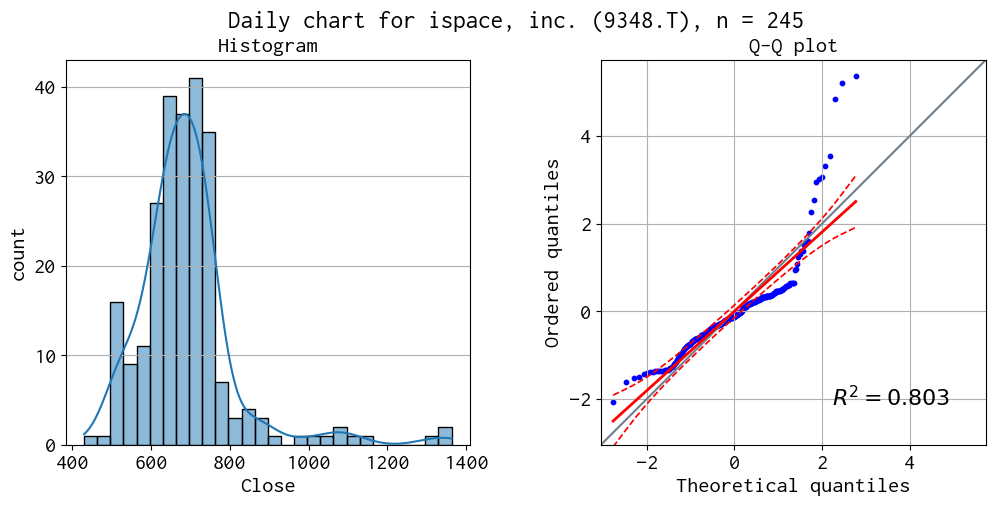

In [12]:
plot_histogram_qqplot(ticker, df)

plt.subplots_adjust(wspace=0.3)
plt.savefig("report_daily_histogram_qqplot_%s.png" % code)
plt.show()